Analizo si las oportunidades que tienen fecha de vencimiento
para el Quote tienden a perder mas, pareceria logico. O quiza tener esta
presion hace que la operacion se lleve a cabo porque no se pospone al
dope.

/home/marcos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/marcos/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-25-b38d4facd14e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

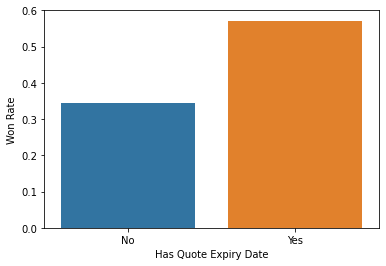

In [25]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('Entrenamieto_ECI_2020.csv')

data['Quote_Expiry_Date'] = pd.to_datetime(data['Quote_Expiry_Date'], 'coerce',
                                           format='%m/%d/%Y')
data.drop_duplicates(subset='Opportunity_ID', inplace=True)
data = data[data['Stage'].isin(['Closed Won', 'Closed Lost'])] #Me quedo con los won y lost, los otros nome interesan


quoteDates = data[['Quote_Expiry_Date', 'Stage']]
quoteDates.loc[~quoteDates['Quote_Expiry_Date'].isnull(), 'Quote_Expiry_Date'] = 'Yes' #Pandas se queja de slice copy pero esta flasheando de nuevo
quoteDates.loc[quoteDates['Quote_Expiry_Date'].isnull(), 'Quote_Expiry_Date'] = 'No' #Pandas se queja de slice copy pero esta flasheando de nuevo
quoteDates.replace(['Closed Won', 'Closed Lost'], [1, 0], inplace=True)
qouteWonRate = quoteDates.groupby('Quote_Expiry_Date').agg({'Stage':'mean'})

qouteWonRate.rename(columns={'Stage':'Won Rate'}, inplace=True)
qouteWonRate.rename_axis(index='Has Quote Expiry Date', inplace=True)
qouteWonRate.reset_index(inplace=True)

sns.barplot(x='Has Quote Expiry Date', y='Won Rate', data=qouteWonRate)